In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def F(t, var, K, dx=1, dy=1, D_p=1, D_q=8, C=4.5):  #I have set dx=dy=1 due to the way that I later discretize space
    """This function contains the system of coupled nonlinear PDEs with the Laplacian discretized by a finite difference approximation."""
    
    p, q = var  #I have the variables p and q
    
    dpdt = D_p * ((np.roll(p, -1, axis=0) - 2*p + np.roll(p, 1, axis=0)) / dx**2 + (np.roll(p, -1, axis=1) - 2*p + np.roll(p, 1, axis=1)) / dy**2) + p**2 * q + C - (K+1) * p
    dqdt = D_q * ((np.roll(q, -1, axis=0) - 2*q + np.roll(q, 1, axis=0)) / dx**2 + (np.roll(q, -1, axis=1) - 2*q + np.roll(q, 1, axis=1)) / dy**2) - p**2 * q + K * p
    
    return np.array([dpdt, dqdt])

In [3]:
def fourth_order_Runge_Kutta(f, var0, dt, t_max, K):
    """This function discretizes the time step by using a fourth order Runge-Kutta scheme and calculates the solutions of the system of PDEs."""
    
    t = np.arange(0, t_max, dt)  #initialize array of time values
    var = np.copy(var0)  #initialize array of variables
    
    for i in tqdm(range(len(t))):  #perform fourth order Runge-Kutta method
        k1 = f(t, var, K=K)
        k2 = f(t+dt/2, var+dt*k1/2, K=K)
        k3 = f(t+dt/2, var+dt*k2/2, K=K)
        k4 = f(t+dt, var+dt*k3, K=K)
        
        var += dt/6 * (k1 + 2*k2 + 2*k3 + k4)  #update variables for the current timestep
        
        #set entries in ghost cells equal to zero (enforces no-flux Neumann boundary condition)
        var[:,0,:] = 0
        var[:,:,0] = 0
    
    return var  #return solutions for the last timestep

In [4]:
def solve_reaction_diffusion(dt, t_max, K, C=4.5, f=F):
    """This function solves the system of PDEs for a given timestep size (dt), maximum time (t_max) and a given value of the parameter K."""
    
    p0 = np.zeros((42, 42))  #discretize space into a 41x41 matrix plus a row and column of ghost cells
    p0[12:31, 12:31] = C + 0.1  #add initial conditions

    q0 = np.zeros((42, 42))  #discretize space into a 41x41 matrix plus a row and column of ghost cells
    q0[12:31, 12:31] = K / C + 0.2  #add initial conditions

    var0 = np.array([p0, q0])  #initialize array of variables
    
    sol = fourth_order_Runge_Kutta(f=f, var0=var0, dt=dt, t_max=t_max, K=K)  #compute solutions
    
    return sol

100%|██████████| 200000/200000 [02:12<00:00, 1509.25it/s]


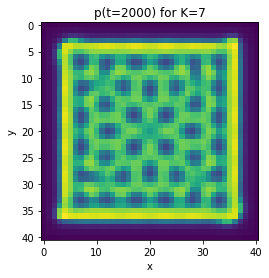

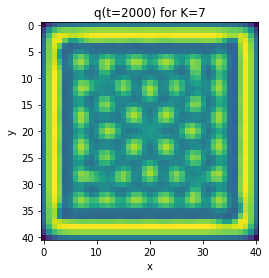

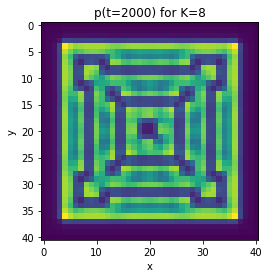

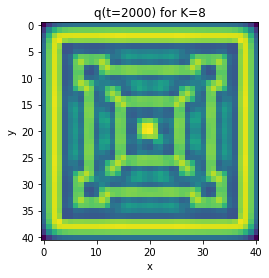

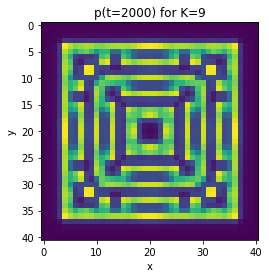

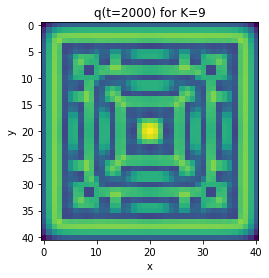

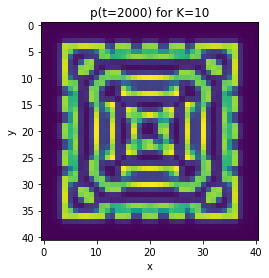

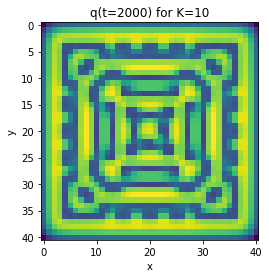

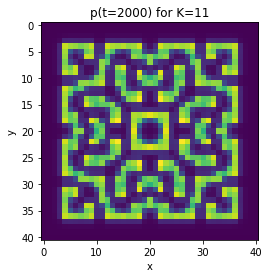

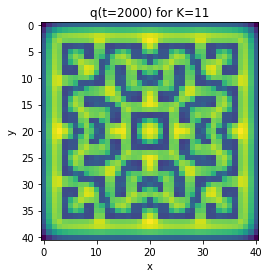

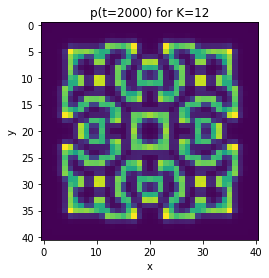

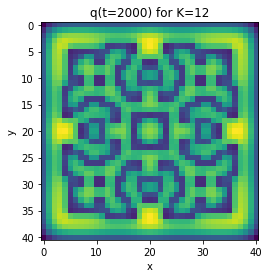

In [5]:
K_values = np.array([7, 8, 9, 10, 11, 12])  #values of K that I want to calculate the solution for

for K in K_values:
    sol = solve_reaction_diffusion(dt=0.01, t_max=2000, K=K)  #solve system for each value of K
    
    #create contour plots of solutions
    plt.figure()
    plt.title(f"p(t=2000) for K={K}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.imshow(sol[0,1:,1:])
    
    plt.figure()
    plt.title(f"q(t=2000) for K={K}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.imshow(sol[1,1:,1:])